### Bonus: Learning Rate Decay


#### Basic Formula

$$ \alpha_{t} = \frac{1}{1 + \alpha_{0} \times 0.001 } $$

#### Model Design

In [2]:
import torch
from matplotlib import pyplot as plt
% matplotlib inline


class MLP(torch.nn.Module):
    
    def __init__(self):
        
        super(MLP, self).__init__()
        
        self.network = torch.nn.Sequential(
            torch.nn.Linear(
                in_features=2,
                out_features=1,
                bias=True
            ),
            torch.nn.Sigmoid()
        )
    
    def forward(self, inputs):
        return self.network(inputs)

#### XOR Dataset

In [17]:
X = torch.tensor(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ],
    dtype=torch.float
)

y = torch.tensor(
    [
        0,
        1,
        1,
        0
    ],
    dtype=torch.float
)


#### Optimizer

In [12]:
model = MLP()

opt = torch.optim.SGD(
    model.parameters(),
    lr=0.01,
    momentum=0.7
)

#### Scheduler

In [13]:
def decayLR(e):
    return 1 / (1 + e * 0.001)


sched = torch.optim.lr_scheduler.LambdaLR(
    opt,
    decayLR
)

#### Objective Function

In [14]:
criterion = torch.nn.BCELoss()

#### Training

In [18]:
lr_logs = []

for epoch in range(10000):
    
    model.zero_grad()
    
    y_ = model(X)
    
    loss = criterion(y_, y)
    
    loss.backward()
    
    opt.step()
    
    sched.step()
    
    lr_logs.append(sched.get_lr())

/home/qamaruddin/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


#### Visualize LR

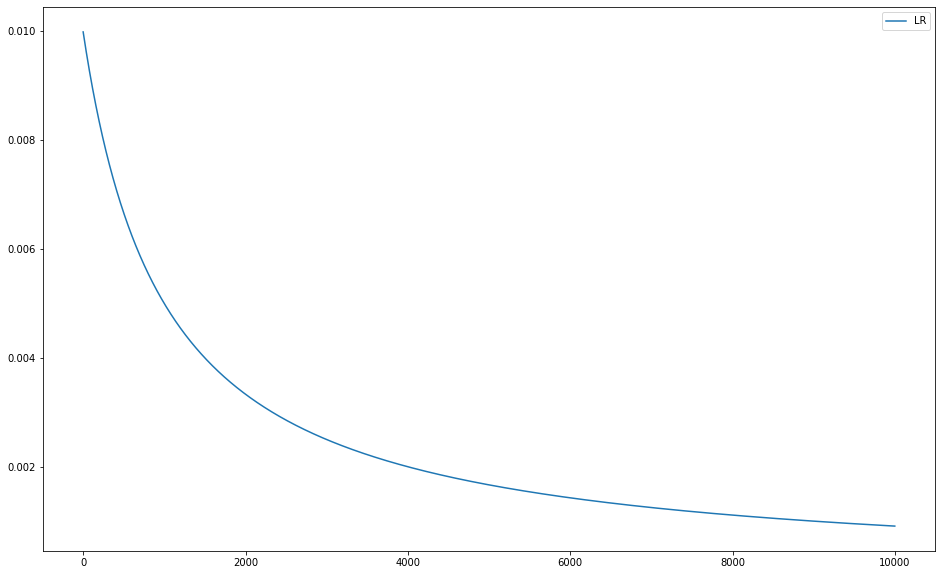

In [19]:
fig = plt.figure(figsize=(16, 10))
plt.plot(lr_logs, label='LR')
plt.legend()
plt.show();